In [39]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data6.xlsx", index_col = 0)    

# 컬럼 추출
# all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        # '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        # '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        # 'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all[['DateTime', '종가_ex','1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
        '5Y_Mid_irs', '10Y_Mid_irs',  '1Y_Mid_crs', '2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]     
        
all2 = all2.set_index("DateTime")

all2['1Y_대비_irs'] = all2['1Y_Mid_irs']-all2['1Y_Mid_irs'].shift(1)
all2['2Y_대비_irs'] = all2['2Y_Mid_irs']-all2['2Y_Mid_irs'].shift(1)
all2['3Y_대비_irs'] = all2['3Y_Mid_irs']-all2['3Y_Mid_irs'].shift(1)
all2['5Y_대비_irs'] = all2['5Y_Mid_irs']-all2['5Y_Mid_irs'].shift(1)
all2['10Y_대비_irs'] = all2['10Y_Mid_irs']-all2['10Y_Mid_irs'].shift(1)
all2['1Y_대비_crs'] = all2['1Y_Mid_crs']-all2['1Y_Mid_crs'].shift(1)
all2['2Y_대비_crs'] = all2['2Y_Mid_crs']-all2['2Y_Mid_crs'].shift(1)
all2['3Y_대비_crs'] = all2['3Y_Mid_crs']-all2['3Y_Mid_crs'].shift(1)
all2['5Y_대비_crs'] = all2['5Y_Mid_crs']-all2['5Y_Mid_crs'].shift(1)
all2['10Y_대비_crs'] = all2['10Y_Mid_crs']-all2['10Y_Mid_crs'].shift(1)


all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안2년']-all2['통안2년'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

# all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
        # #     "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]]

# DateTime을 인덱스로 바꿔주기
df.head(2)

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-02,1131.7,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,0.04,-0.03,-0.04,-0.04,-0.04,-0.03,-0.05,1.75,2.5,1126.5
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.01,4.00,2.4,1131.7


In [40]:
x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]]
y = df[["종가_ex"]]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled


,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.217081,-0.935854,-1.045679,-1.009126,-0.205655,0.707360,0.905480,0.926463,0.826282,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,0.079167,1.909409,-0.149841
2012-08-03,-0.847862,-0.731532,-0.562378,-0.628002,-0.403231,-0.205655,-0.364505,-0.463176,-1.872849,-3.115790,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,0.184972,1.818881,-0.056232
2012-08-06,0.560374,0.482340,0.371312,0.416191,0.202663,-0.003373,-0.602697,-0.691285,-0.939745,-0.833538,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,-0.449862,1.818881,-0.000426
2012-08-07,0.278727,-0.003209,-0.002164,0.207352,0.404628,0.401191,0.350072,-0.006957,-1.639573,-1.663448,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,0.020386,1.909409,-0.104837
2012-08-08,0.278727,0.482340,0.371312,0.416191,0.606592,0.198909,-0.007216,-0.006957,-0.473193,-0.833538,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,0.055654,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945404,-1.309330,-1.881032,-2.220914,-1.621628,-2.150945,-1.603722,-2.572677,-2.285880,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,0.154406,-0.896960,3.207485
2022-07-26,-0.284568,-0.488757,-0.562378,-0.628002,-0.605196,0.198909,-0.721793,-0.691285,-0.473193,-0.418583,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,0.050952,-0.987488,3.220086
2022-07-27,-0.284568,-1.217081,-1.122592,-1.254517,-1.211091,0.198909,-0.245409,-0.235067,-0.239917,-0.211106,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.026639,-0.851696,3.110275


<AxesSubplot:>

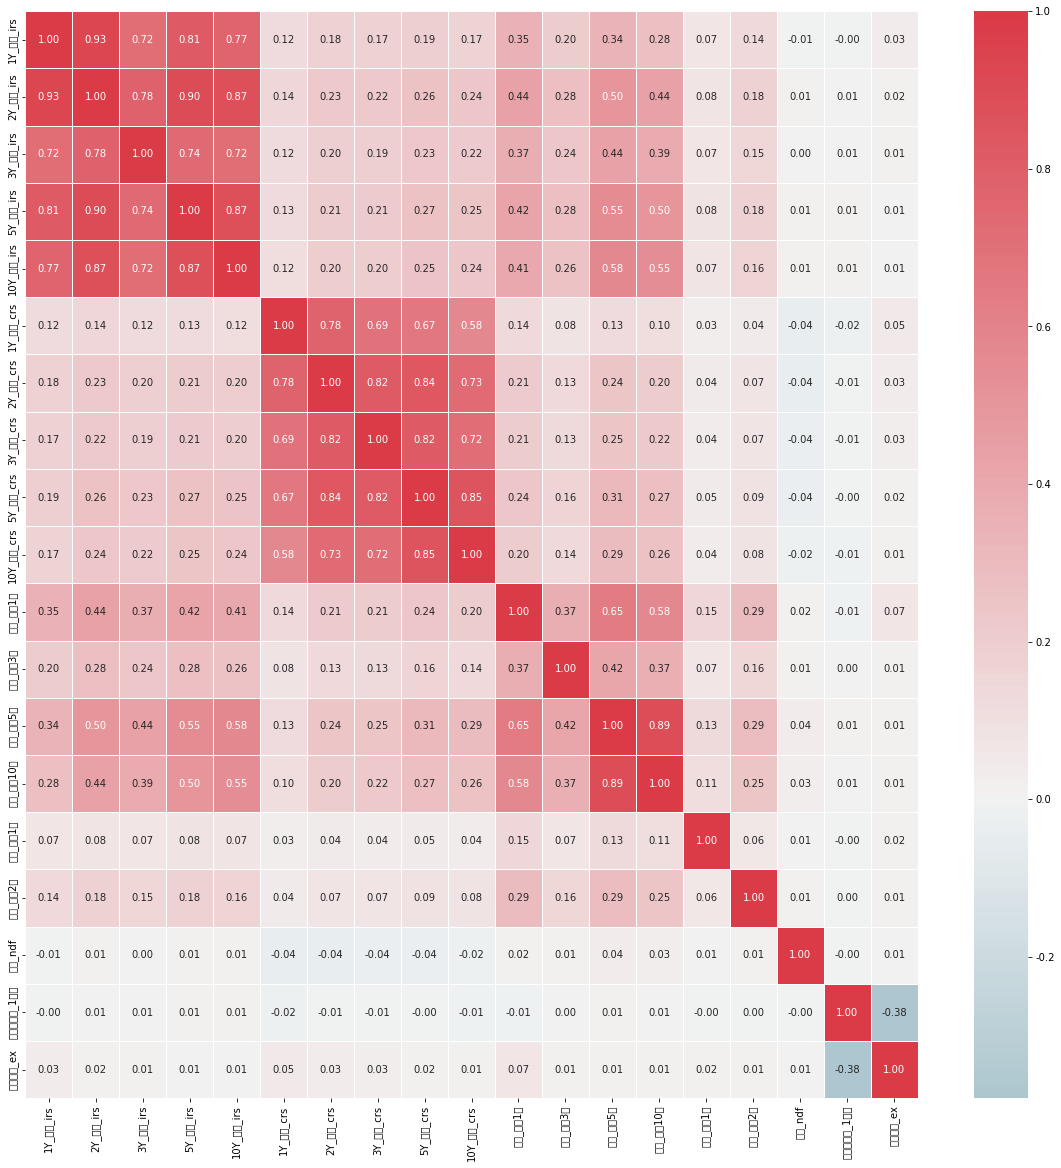

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.980156   1Y_대비_irs
1    19.542394   2Y_대비_irs
2     2.662429   3Y_대비_irs
3     6.469834   5Y_대비_irs
4     5.882753  10Y_대비_irs
5     2.651710   1Y_대비_crs
6     5.265417   2Y_대비_crs
7     3.830545   3Y_대비_crs
8     6.700429   5Y_대비_crs
9     3.717961  10Y_대비_crs
10    1.926054     대비_국고1년
11    1.253548     대비_국고3년
12    6.256724     대비_국고5년
13    5.053702    대비_국고10년
14    1.025266     대비_통안1년
15    1.115690     대비_통안2년
16    1.007463      대비_ndf
17    1.169036   스왑포인트_1월물
18    1.181751     전일종가_ex


In [43]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.345e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:49   Log-Likelihood:                -7641.3
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2439   BIC:                         1.544e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.1807      0.346      0.522      0.602      -0.498       0.860
2Y_대비_irs      0.5089      0.484      1.050      0.294      -0.441       1.459
3Y_대비_irs      0.0106      0.179      0.059      0.953      -0.340       0.361
5Y_대비_irs     -0.2651      0.279     -0.951      0.342      -0.812       0.281
10Y_대비_irs    -0.5130      0.266     -1.930      0.054      -1.034       0.008
1Y_대비_crs     -1.0810      0.178     -6.058      0.000      -1.431      -0.731
2Y_대비_crs     -0.2480      0.251     -0.986      0.324      -0.741       0.245
3Y_대비_crs     -0.4276      0.214     -1.994      0.046      -0.848      -0.007
5Y_대비_crs     -0.1692      0.284     -0.597      0.551      -0.725       0.387
10Y_대비_crs     0.1808      0.211      0.856      0.392      -0.234       0.595
대비_국고1년        0.0983      0.152      0.647      0.518      -0.200       0.397
대비_국고3년       -0.2714      0.123     -2.212      0.027      -0.512      -0.031
대비_국고5년        1.0111      0.274      3.689      0.000       0.474       1.549
대비_국고10년      -0.2588      0.246     -1.051      0.294      -0.742       0.224
대비_통안1년       -0.0053      0.111     -0.048      0.962      -0.223       0.212
대비_통안2년        0.0899      0.116      0.777      0.437      -0.137       0.317
대비_ndf         0.5272      0.110      4.793      0.000       0.311       0.743
스왑포인트_1월물     -0.1414      0.118     -1.194      0.233      -0.374       0.091
전일종가_ex       55.3501      0.119    464.660      0.000      55.116      55.584
==============================================================================
Omnibus:                       39.078   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.618
Skew:                          -0.022   Prob(JB):                     1.03e-16
Kurtosis:                       3.847   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.931041   1Y_대비_irs
1     2.551871   3Y_대비_irs
2     5.803815   5Y_대비_irs
3     5.225115  10Y_대비_irs
4     2.648914   1Y_대비_crs
5     5.254066   2Y_대비_crs
6     3.828055   3Y_대비_crs
7     6.694809   5Y_대비_crs
8     3.717836  10Y_대비_crs
9     1.915005     대비_국고1년
10    1.247529     대비_국고3년
11    6.170466     대비_국고5년
12    5.039788    대비_국고10년
13    1.024900     대비_통안1년
14    1.114992     대비_통안2년
15    1.005206      대비_ndf
16    1.168988   스왑포인트_1월물
17    1.180950     전일종가_ex


In [45]:
x_scaled.drop(['대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.928809   1Y_대비_irs
1     2.551573   3Y_대비_irs
2     5.803268   5Y_대비_irs
3     5.217870  10Y_대비_irs
4     2.648874   1Y_대비_crs
5     5.253922   2Y_대비_crs
6     3.827862   3Y_대비_crs
7     6.694545   5Y_대비_crs
8     3.717814  10Y_대비_crs
9     1.884662     대비_국고1년
10    1.246905     대비_국고3년
11    6.131356     대비_국고5년
12    5.039751    대비_국고10년
13    1.024805     대비_통안1년
14    1.005198      대비_ndf
15    1.168988   스왑포인트_1월물
16    1.180918     전일종가_ex


In [46]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:51   Log-Likelihood:                -7642.2
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2441   BIC:                         1.542e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4680      0.217      2.155      0.031       0.042       0.894
3Y_대비_irs      0.0504      0.175      0.288      0.774      -0.293       0.394
5Y_대비_irs     -0.1691      0.264     -0.641      0.522      -0.687       0.348
10Y_대비_irs    -0.4271      0.250     -1.706      0.088      -0.918       0.064
1Y_대비_crs     -1.0865      0.178     -6.093      0.000      -1.436      -0.737
2Y_대비_crs     -0.2368      0.251     -0.943      0.346      -0.729       0.256
3Y_대비_crs     -0.4345      0.214     -2.027      0.043      -0.855      -0.014
5Y_대비_crs     -0.1592      0.284     -0.562      0.575      -0.715       0.397
10Y_대비_crs     0.1817      0.211      0.860      0.390      -0.233       0.596
대비_국고1년        0.1258      0.150      0.836      0.403      -0.169       0.421
대비_국고3년       -0.2603      0.122     -2.127      0.034      -0.500      -0.020
대비_국고5년        1.0623      0.271      3.915      0.000       0.530       1.594
대비_국고10년      -0.2729      0.246     -1.109      0.267      -0.755       0.209
대비_통안1년       -0.0066      0.111     -0.060      0.952      -0.224       0.211
대비_ndf         0.5329      0.110      4.851      0.000       0.317       0.748
스왑포인트_1월물     -0.1406      0.118     -1.187      0.235      -0.373       0.092
전일종가_ex       55.3463      0.119    464.817      0.000      55.113      55.580
==============================================================================
Omnibus:                       38.575   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.305
Skew:                          -0.022   Prob(JB):                     1.99e-16
Kurtosis:                       3.839   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '대비_통안1년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.608553   1Y_대비_irs
1     5.676359   5Y_대비_irs
2     5.097400  10Y_대비_irs
3     2.646995   1Y_대비_crs
4     4.562720   2Y_대비_crs
5     3.453358   3Y_대비_crs
6     2.433366  10Y_대비_crs
7     1.869181     대비_국고1년
8     1.245908     대비_국고3년
9     6.116741     대비_국고5년
10    5.039217    대비_국고10년
11    1.004791      대비_ndf
12    1.168965   스왑포인트_1월물
13    1.180549     전일종가_ex


In [48]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:54   Log-Likelihood:                -7642.4
No. Observations:                2459   AIC:                         1.531e+04
Df Residuals:                    2444   BIC:                         1.540e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4909      0.208      2.360      0.018       0.083       0.899
5Y_대비_irs     -0.1629      0.261     -0.624      0.533      -0.674       0.349
10Y_대비_irs    -0.4197      0.247     -1.697      0.090      -0.905       0.065
1Y_대비_crs     -1.0868      0.178     -6.099      0.000      -1.436      -0.737
2Y_대비_crs     -0.2862      0.234     -1.224      0.221      -0.745       0.172
3Y_대비_crs     -0.4727      0.204     -2.323      0.020      -0.872      -0.074
10Y_대비_crs     0.1135      0.171      0.665      0.506      -0.221       0.449
대비_국고1년        0.1269      0.150      0.847      0.397      -0.167       0.420
대비_국고3년       -0.2606      0.122     -2.132      0.033      -0.500      -0.021
대비_국고5년        1.0580      0.271      3.906      0.000       0.527       1.589
대비_국고10년      -0.2718      0.246     -1.106      0.269      -0.754       0.210
대비_ndf         0.5341      0.110      4.865      0.000       0.319       0.749
스왑포인트_1월물     -0.1408      0.118     -1.189      0.235      -0.373       0.091
전일종가_ex       55.3465      0.119    465.139      0.000      55.113      55.580
==============================================================================
Omnibus:                       38.479   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.070
Skew:                          -0.021   Prob(JB):                     2.24e-16
Kurtosis:                       3.838   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
x_scaled.drop(['10Y_대비_crs', '5Y_대비_irs', '스왑포인트_1월물'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.800340   1Y_대비_irs
1     3.617731  10Y_대비_irs
2     2.643886   1Y_대비_crs
3     4.164259   2Y_대비_crs
4     3.139855   3Y_대비_crs
5     1.864267     대비_국고1년
6     1.244845     대비_국고3년
7     6.047369     대비_국고5년
8     5.037267    대비_국고10년
9     1.004569      대비_ndf
10    1.010559     전일종가_ex


In [50]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.326e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:57   Log-Likelihood:                -7643.5
No. Observations:                2459   AIC:                         1.531e+04
Df Residuals:                    2447   BIC:                         1.538e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.109   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4242      0.183      2.315      0.021       0.065       0.784
10Y_대비_irs    -0.4946      0.208     -2.375      0.018      -0.903      -0.086
1Y_대비_crs     -1.0819      0.178     -6.077      0.000      -1.431      -0.733
2Y_대비_crs     -0.2443      0.223     -1.093      0.274      -0.682       0.194
3Y_대비_crs     -0.4342      0.194     -2.238      0.025      -0.815      -0.054
대비_국고1년        0.1187      0.150      0.794      0.427      -0.174       0.412
대비_국고3년       -0.2627      0.122     -2.150      0.032      -0.502      -0.023
대비_국고5년        1.0495      0.269      3.898      0.000       0.521       1.578
대비_국고10년      -0.2695      0.246     -1.096      0.273      -0.751       0.212
대비_ndf         0.5348      0.110      4.873      0.000       0.320       0.750
전일종가_ex       55.4003      0.110    503.308      0.000      55.184      55.616
==============================================================================
Omnibus:                       39.140   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.739
Skew:                          -0.023   Prob(JB):                     9.72e-17
Kurtosis:                       3.847   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
x_scaled.drop(['2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.558e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:58   Log-Likelihood:                -7644.1
No. Observations:                2459   AIC:                         1.531e+04
Df Residuals:                    2448   BIC:                         1.537e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4225      0.183      2.306      0.021       0.063       0.782
10Y_대비_irs    -0.4976      0.208     -2.390      0.017      -0.906      -0.089
1Y_대비_crs     -1.1825      0.152     -7.757      0.000      -1.481      -0.884
3Y_대비_crs     -0.5602      0.156     -3.588      0.000      -0.866      -0.254
대비_국고1년        0.1153      0.149      0.772      0.440      -0.178       0.408
대비_국고3년       -0.2641      0.122     -2.162      0.031      -0.504      -0.025
대비_국고5년        1.0356      0.269      3.850      0.000       0.508       1.563
대비_국고10년      -0.2646      0.246     -1.077      0.282      -0.746       0.217
대비_ndf         0.5364      0.110      4.888      0.000       0.321       0.752
전일종가_ex       55.4006      0.110    503.294      0.000      55.185      55.616
==============================================================================
Omnibus:                       39.728   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.401
Skew:                          -0.019   Prob(JB):                     4.23e-17
Kurtosis:                       3.857   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
x_scaled.drop(['대비_국고3년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:51:59   Log-Likelihood:                -7646.4
No. Observations:                2459   AIC:                         1.531e+04
Df Residuals:                    2449   BIC:                         1.537e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4050      0.183      2.211      0.027       0.046       0.764
10Y_대비_irs    -0.4881      0.208     -2.343      0.019      -0.897      -0.080
1Y_대비_crs     -1.1845      0.153     -7.764      0.000      -1.484      -0.885
3Y_대비_crs     -0.5632      0.156     -3.605      0.000      -0.870      -0.257
대비_국고1년        0.0731      0.148      0.493      0.622      -0.218       0.364
대비_국고5년        0.9480      0.266      3.563      0.000       0.426       1.470
대비_국고10년      -0.2585      0.246     -1.051      0.293      -0.741       0.224
대비_ndf         0.5366      0.110      4.886      0.000       0.321       0.752
전일종가_ex       55.4022      0.110    502.941      0.000      55.186      55.618
==============================================================================
Omnibus:                       40.057   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.051
Skew:                          -0.026   Prob(JB):                     3.06e-17
Kurtosis:                       3.860   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
x_scaled.drop(['대비_국고1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.194e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:52:01   Log-Likelihood:                -7646.6
No. Observations:                2459   AIC:                         1.531e+04
Df Residuals:                    2450   BIC:                         1.536e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.04e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4237      0.179      2.365      0.018       0.072       0.775
10Y_대비_irs    -0.5015      0.207     -2.428      0.015      -0.907      -0.096
1Y_대비_crs     -1.1824      0.152     -7.755      0.000      -1.481      -0.883
3Y_대비_crs     -0.5618      0.156     -3.597      0.000      -0.868      -0.256
대비_국고5년        0.9929      0.250      3.971      0.000       0.503       1.483
대비_국고10년      -0.2549      0.246     -1.037      0.300      -0.737       0.227
대비_ndf         0.5364      0.110      4.885      0.000       0.321       0.752
전일종가_ex       55.4063      0.110    504.480      0.000      55.191      55.622
==============================================================================
Omnibus:                       39.719   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.064
Skew:                          -0.029   Prob(JB):                     5.01e-17
Kurtosis:                       3.854   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 27.543264974737788, RMSE :  5.248, MAE: 5.248
Variance score :  0.991


In [55]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(8.063712524270695,
 array([ 4.13253966,  6.71611705,  5.70760274, 18.62890419,  5.13339898]),
 array([ -17.07788401,  -45.10622819,  -32.57672905, -347.03607147,
         -26.35178512]))